<a href="https://colab.research.google.com/github/aerkha/aerkha/blob/main/Mid_Market_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 100.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import six
import pyogrio; help(pyogrio.read_dataframe)
import matplotlib.cm as cm
import matplotlib.colors as colors
import plotly.express as px
import json
import plotly.graph_objects as go

Help on function read_dataframe in module pyogrio.geopandas:

read_dataframe(path_or_buffer, /, layer=None, encoding=None, columns=None, read_geometry=True, force_2d=False, skip_features=0, max_features=None, where=None, bbox=None, mask=None, fids=None, sql=None, sql_dialect=None, fid_as_index=False, use_arrow=None, on_invalid='raise', arrow_to_pandas_kwargs=None, **kwargs)
    Read from an OGR data source to a GeoPandas GeoDataFrame or Pandas DataFrame.
    
    If the data source does not have a geometry column or ``read_geometry`` is False,
    a DataFrame will be returned.
    
    Requires ``geopandas`` >= 0.8.
    
    Parameters
    ----------
    path_or_buffer : pathlib.Path or str, or bytes buffer
        A dataset path or URI, raw buffer, or file-like object with a read method.
    layer : int or str, optional (default: first layer)
        If an integer is provided, it corresponds to the index of the layer
        with the data source.  If a string is provided, it must matc

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/peta_mid_market.csv')

In [ ]:
df

,ID_Kota,Kota,ID_Kec,Kec,Total_Account
0,ID1671,Kota Palembang,ID1671060,Ilir Timur II,312
1,ID1671,Kota Palembang,ID1671020,Seberang Ulu I,66
2,ID1671,Kota Palembang,ID1671062,Ilir Timur III,0
3,ID1671,Kota Palembang,ID1671030,Seberang Ulu II,58
4,ID1671,Kota Palembang,ID1671050,Ilir Timur I,331
...,...,...,...,...,...
7064,ID3312,Wonogiri,ID3312888,Waduk Gajahmungkur,0
7065,ID3214,Purwakarta,ID3214888,Waduk Jatiluhur,0
7066,ID3388,Wadung Kedungombo,ID3388888,Waduk Kedungombo,0
7067,ID3322,Semarang,ID3322888,Waduk Rawapening,0


In [ ]:
zip_map = gpd.read_file('/content/drive/My Drive/idn_adm_bps_20200401_shp.zip', layer='idn_admbnda_adm3_bps_20200401')
zip_map.head()

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,0.279866,0.003108,2 X 11 Enam Lingkung,ID1306050,None,None,None,Padang Pariaman,ID1306,Sumatera Barat,ID13,Indonesia,ID,2019-12-20,2020-04-01,0000/00/00,"POLYGON ((100.28114 -0.55432, 100.28114 -0.554..."
1,0.751400,0.016926,2 X 11 Kayu Tanam,ID1306052,None,None,None,Padang Pariaman,ID1306,Sumatera Barat,ID13,Indonesia,ID,2019-12-20,2020-04-01,0000/00/00,"POLYGON ((100.33174 -0.48864, 100.33331 -0.488..."
2,0.690006,0.024636,Abab,ID1612030,None,None,None,Penukal Abab Lematang Ilir,ID1612,Sumatera Selatan,ID16,Indonesia,ID,2019-12-20,2020-04-01,0000/00/00,"POLYGON ((104.24632 -3.09042, 104.24498 -3.096..."
3,0.648363,0.010761,Abang,ID5107050,None,None,None,Karang Asem,ID5107,Bali,ID51,Indonesia,ID,2019-12-20,2020-04-01,0000/00/00,"POLYGON ((115.62074 -8.30788, 115.62102 -8.308..."
4,0.243707,0.001160,Abeli,ID7471021,None,None,None,Kota Kendari,ID7471,Sulawesi Tenggara,ID74,Indonesia,ID,2019-12-20,2020-04-01,0000/00/00,"POLYGON ((122.58978 -3.98013, 122.58986 -3.980..."


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7069 entries, 0 to 7068
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Shape_Leng  7069 non-null   float64       
 1   Shape_Area  7069 non-null   float64       
 2   ADM3_EN     7069 non-null   object        
 3   ADM3_PCODE  7069 non-null   object        
 4   ADM3_REF    8 non-null      object        
 5   ADM3ALT1EN  0 non-null      object        
 6   ADM3ALT2EN  0 non-null      object        
 7   ADM2_EN     7069 non-null   object        
 8   ADM2_PCODE  7069 non-null   object        
 9   ADM1_EN     7069 non-null   object        
 10  ADM1_PCODE  7069 non-null   object        
 11  ADM0_EN     7069 non-null   object        
 12  ADM0_PCODE  7069 non-null   object        
 13  date        7069 non-null   datetime64[ms]
 14  validOn     7069 non-null   datetime64[ms]
 15  validTo     7069 non-null   object        
 16  geometry    7069

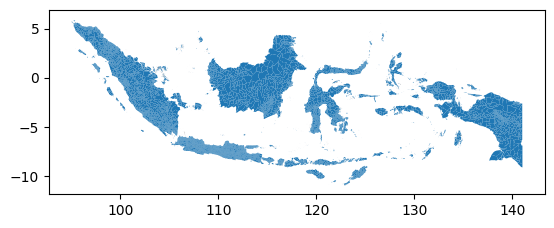

In [ ]:
zip_map.plot()
zip_map.info()

In [ ]:
kecamatan = pd.DataFrame(zip_map[['ADM3_PCODE', 'ADM3_EN']])
kecamatan
zip_map.to_csv('/content/drive/My Drive/peta_shp.csv', index=False)

In [ ]:
merged = zip_map.set_index('ADM3_PCODE').join(df.set_index('ID_Kec'))
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 7069 entries, ID1306050 to ID9418121
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Shape_Leng     7069 non-null   float64       
 1   Shape_Area     7069 non-null   float64       
 2   ADM3_EN        7069 non-null   object        
 3   ADM3_REF       8 non-null      object        
 4   ADM3ALT1EN     0 non-null      object        
 5   ADM3ALT2EN     0 non-null      object        
 6   ADM2_EN        7069 non-null   object        
 7   ADM2_PCODE     7069 non-null   object        
 8   ADM1_EN        7069 non-null   object        
 9   ADM1_PCODE     7069 non-null   object        
 10  ADM0_EN        7069 non-null   object        
 11  ADM0_PCODE     7069 non-null   object        
 12  date           7069 non-null   datetime64[ms]
 13  validOn        7069 non-null   datetime64[ms]
 14  validTo        7069 non-null   object        
 15  geome

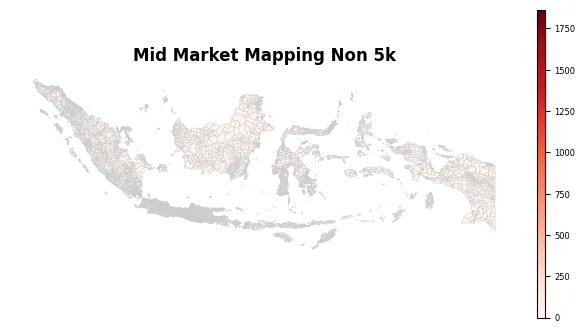

In [ ]:
# Buat figure dan axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor("#ffffff")
ax.axis("off")

# Plot peta
merged.plot(column="Total_Account", cmap="Reds", linewidth=0.3, ax=ax, edgecolor="0.8")

# Buat color map dan normalisasi
cmap = cm.Reds
norm = colors.Normalize(vmin=merged["Total_Account"].min(), vmax=merged["Total_Account"].max())

# Tambahkan colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", aspect=40, shrink=0.5, pad=0.03)
cbar.ax.tick_params(labelsize=6)

# Set judul
ax.set_title("Mid Market Mapping Non 5k", fontdict={"fontsize": 12, "fontweight": "bold"})

# Aktifkan zoom interaktif
plt.show()


In [ ]:
# Pastikan GeoDataFrame memiliki CRS yang sesuai
if merged.crs is None or merged.crs.to_string() != "EPSG:4326":
    merged = merged.to_crs(epsg=4326)  # Pastikan dalam EPSG:4326 untuk kompatibilitas dengan Plotly

# Konversi GeoDataFrame ke GeoJSON
geojson_data = json.loads(merged.to_json())

# Pilih kolom yang berisi ID unik wilayah (sesuaikan dengan struktur GeoJSON)
id_column = "ADM3_PCODE"

# Pastikan ada kolom data untuk pewarnaan peta (misalnya, Total_Account)
if "Total_Account" not in merged.columns:
    merged["Total_Account"] = 1  # Gunakan nilai default jika kolom tidak ada

# Buat Choropleth Map menggunakan Plotly Express
fig = px.choropleth_mapbox(
    merged,
    geojson=geojson_data,
    locations=merged.index,  # Harus sesuai dengan GeoJSON
    featureidkey="properties.ADM3_PCODE",  # Sesuaikan dengan struktur GeoJSON
    color="Total_Account",  # Kolom yang digunakan untuk pewarnaan
    color_continuous_scale="Reds",  # Skema warna
    mapbox_style="carto-positron",  # Gaya peta
    zoom=5,  # Zoom level awal
    opacity=0.6
)

fig.update_traces(marker_line_width=1, marker_line_color="blue")

# Tampilkan peta
fig.show()


In [ ]:
merged_jkt = zip_map[zip_map['ADM1_EN'] == 'Dki Jakarta'].set_index('ADM3_PCODE').join(df.set_index('ID_Kec'))
merged_jkt.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 46 entries, ID3172080 to ID3171090
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Shape_Leng     46 non-null     float64       
 1   Shape_Area     46 non-null     float64       
 2   ADM3_EN        46 non-null     object        
 3   ADM3_REF       0 non-null      object        
 4   ADM3ALT1EN     0 non-null      object        
 5   ADM3ALT2EN     0 non-null      object        
 6   ADM2_EN        46 non-null     object        
 7   ADM2_PCODE     46 non-null     object        
 8   ADM1_EN        46 non-null     object        
 9   ADM1_PCODE     46 non-null     object        
 10  ADM0_EN        46 non-null     object        
 11  ADM0_PCODE     46 non-null     object        
 12  date           46 non-null     datetime64[ms]
 13  validOn        46 non-null     datetime64[ms]
 14  validTo        46 non-null     object        
 15  geometr

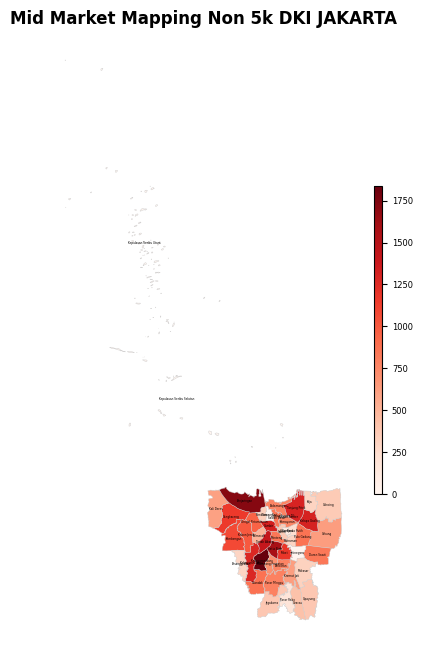

In [ ]:
# Buat figure dan axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor("#ffffff")
ax.axis("off")

# Plot peta
merged_jkt.plot(column="Total_Account", cmap="Reds", linewidth=0.3, ax=ax, edgecolor="0.8")

# Buat color map dan normalisasi
cmap = cm.Reds
norm = colors.Normalize(vmin=merged_jkt["Total_Account"].min(), vmax=merged_jkt["Total_Account"].max())

# Tambahkan colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", aspect=40, shrink=0.5, pad=0.03)
cbar.ax.tick_params(labelsize=6)

# Tambahkan label nama kecamatan
for idx, row in merged_jkt.iterrows():
    centroid = row["geometry"].centroid  # Ambil titik tengah polygon
    ax.text(centroid.x, centroid.y, row["ADM3_EN"], fontsize=2, ha="center", va="center", color="black")

# Set judul
ax.set_title("Mid Market Mapping Non 5k DKI JAKARTA", fontdict={"fontsize": 12, "fontweight": "bold"})

# Simpan gambar dengan resolusi tinggi
plt.savefig("/content/drive/My Drive/midmarket_jakarta.png", dpi=300, bbox_inches="tight")

# Tampilkan plot
plt.show()

In [ ]:
merged_jabar = zip_map[zip_map['ADM1_EN'] == 'Jawa Barat'].set_index('ADM3_PCODE').join(df.set_index('ID_Kec'))
merged_jabar.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 630 entries, ID3203010 to ID3212070
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Shape_Leng     630 non-null    float64       
 1   Shape_Area     630 non-null    float64       
 2   ADM3_EN        630 non-null    object        
 3   ADM3_REF       0 non-null      object        
 4   ADM3ALT1EN     0 non-null      object        
 5   ADM3ALT2EN     0 non-null      object        
 6   ADM2_EN        630 non-null    object        
 7   ADM2_PCODE     630 non-null    object        
 8   ADM1_EN        630 non-null    object        
 9   ADM1_PCODE     630 non-null    object        
 10  ADM0_EN        630 non-null    object        
 11  ADM0_PCODE     630 non-null    object        
 12  date           630 non-null    datetime64[ms]
 13  validOn        630 non-null    datetime64[ms]
 14  validTo        630 non-null    object        
 15  geomet

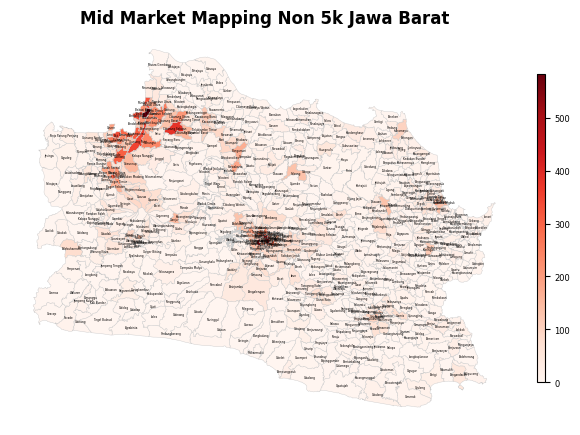

In [ ]:
# Buat figure dan axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor("#ffffff")
ax.axis("off")

# Plot peta
merged_jabar.plot(column="Total_Account", cmap="Reds", linewidth=0.3, ax=ax, edgecolor="0.8")

# Buat color map dan normalisasi
cmap = cm.Reds
norm = colors.Normalize(vmin=merged_jabar["Total_Account"].min(), vmax=merged_jabar["Total_Account"].max())

# Tambahkan colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", aspect=40, shrink=0.5, pad=0.03)
cbar.ax.tick_params(labelsize=6)

# Tambahkan label nama kecamatan
for idx, row in merged_jabar.iterrows():
    centroid = row["geometry"].centroid  # Ambil titik tengah polygon
    ax.text(centroid.x, centroid.y, row["ADM3_EN"], fontsize=2, ha="center", va="center", color="black")

# Set judul
ax.set_title("Mid Market Mapping Non 5k Jawa Barat", fontdict={"fontsize": 12, "fontweight": "bold"})

# Simpan gambar dengan resolusi tinggi
plt.savefig("/content/drive/My Drive/midmarket_jabar.png", dpi=300, bbox_inches="tight")

# Tampilkan plot
plt.show()

In [ ]:
merged_jateng = zip_map[zip_map['ADM1_EN'] == 'Jawa Tengah'].set_index('ADM3_PCODE').join(df.set_index('ID_Kec'))
merged_jateng.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 577 entries, ID3305150 to ID3312110
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Shape_Leng     577 non-null    float64       
 1   Shape_Area     577 non-null    float64       
 2   ADM3_EN        577 non-null    object        
 3   ADM3_REF       0 non-null      object        
 4   ADM3ALT1EN     0 non-null      object        
 5   ADM3ALT2EN     0 non-null      object        
 6   ADM2_EN        577 non-null    object        
 7   ADM2_PCODE     577 non-null    object        
 8   ADM1_EN        577 non-null    object        
 9   ADM1_PCODE     577 non-null    object        
 10  ADM0_EN        577 non-null    object        
 11  ADM0_PCODE     577 non-null    object        
 12  date           577 non-null    datetime64[ms]
 13  validOn        577 non-null    datetime64[ms]
 14  validTo        577 non-null    object        
 15  geomet

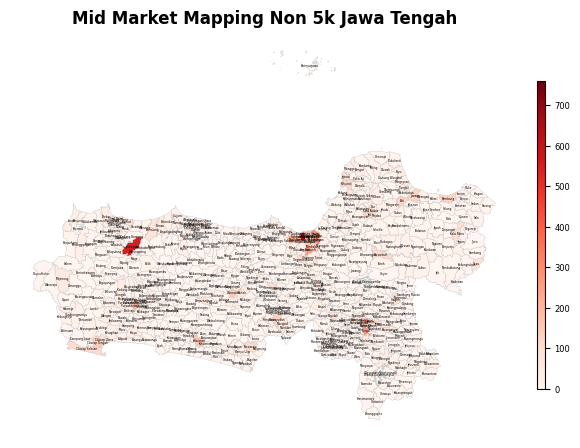

In [ ]:
# Buat figure dan axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor("#ffffff")
ax.axis("off")

# Plot peta
merged_jateng.plot(column="Total_Account", cmap="Reds", linewidth=0.3, ax=ax, edgecolor="0.8")

# Buat color map dan normalisasi
cmap = cm.Reds
norm = colors.Normalize(vmin=merged_jateng["Total_Account"].min(), vmax=merged_jateng["Total_Account"].max())

# Tambahkan colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", aspect=40, shrink=0.5, pad=0.03)
cbar.ax.tick_params(labelsize=6)

# Tambahkan label nama kecamatan
for idx, row in merged_jateng.iterrows():
    centroid = row["geometry"].centroid  # Ambil titik tengah polygon
    ax.text(centroid.x, centroid.y, row["ADM3_EN"], fontsize=2, ha="center", va="center", color="black")

# Set judul
ax.set_title("Mid Market Mapping Non 5k Jawa Tengah", fontdict={"fontsize": 12, "fontweight": "bold"})

# Simpan gambar dengan resolusi tinggi
plt.savefig("/content/drive/My Drive/midmarket_jateng.png", dpi=300, bbox_inches="tight")

# Tampilkan plot
plt.show()

In [ ]:
merged_jatim = zip_map[zip_map['ADM1_EN'] == 'Jawa Timur'].set_index('ADM3_PCODE').join(df.set_index('ID_Kec'))
merged_jatim.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 667 entries, ID3509110 to ID3508090
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Shape_Leng     667 non-null    float64       
 1   Shape_Area     667 non-null    float64       
 2   ADM3_EN        667 non-null    object        
 3   ADM3_REF       0 non-null      object        
 4   ADM3ALT1EN     0 non-null      object        
 5   ADM3ALT2EN     0 non-null      object        
 6   ADM2_EN        667 non-null    object        
 7   ADM2_PCODE     667 non-null    object        
 8   ADM1_EN        667 non-null    object        
 9   ADM1_PCODE     667 non-null    object        
 10  ADM0_EN        667 non-null    object        
 11  ADM0_PCODE     667 non-null    object        
 12  date           667 non-null    datetime64[ms]
 13  validOn        667 non-null    datetime64[ms]
 14  validTo        667 non-null    object        
 15  geomet

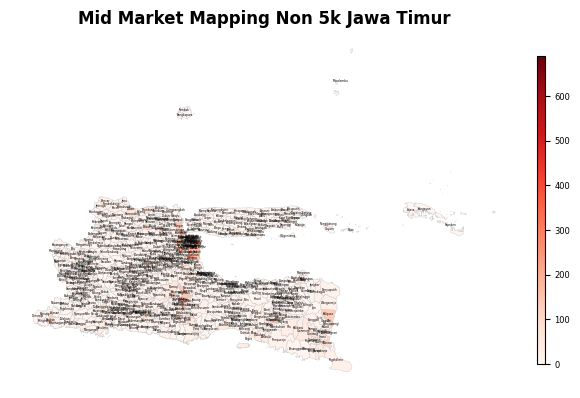

In [ ]:
# Buat figure dan axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor("#ffffff")
ax.axis("off")

# Plot peta
merged_jatim.plot(column="Total_Account", cmap="Reds", linewidth=0.3, ax=ax, edgecolor="0.8")

# Buat color map dan normalisasi
cmap = cm.Reds
norm = colors.Normalize(vmin=merged_jatim["Total_Account"].min(), vmax=merged_jatim["Total_Account"].max())

# Tambahkan colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", aspect=40, shrink=0.5, pad=0.03)
cbar.ax.tick_params(labelsize=6)

# Tambahkan label nama kecamatan
for idx, row in merged_jatim.iterrows():
    centroid = row["geometry"].centroid  # Ambil titik tengah polygon
    ax.text(centroid.x, centroid.y, row["ADM3_EN"], fontsize=2, ha="center", va="center", color="black")

# Set judul
ax.set_title("Mid Market Mapping Non 5k Jawa Timur", fontdict={"fontsize": 12, "fontweight": "bold"})

# Simpan gambar dengan resolusi tinggi
plt.savefig("/content/drive/My Drive/midmarket_jatim.png", dpi=300, bbox_inches="tight")

# Tampilkan plot
plt.show()

In [ ]:
merged_bali = zip_map[zip_map['ADM1_EN'] == 'Bali'].set_index('ADM3_PCODE').join(df.set_index('ID_Kec'))
merged_bali.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 57 entries, ID5107050 to ID5104050
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Shape_Leng     57 non-null     float64       
 1   Shape_Area     57 non-null     float64       
 2   ADM3_EN        57 non-null     object        
 3   ADM3_REF       0 non-null      object        
 4   ADM3ALT1EN     0 non-null      object        
 5   ADM3ALT2EN     0 non-null      object        
 6   ADM2_EN        57 non-null     object        
 7   ADM2_PCODE     57 non-null     object        
 8   ADM1_EN        57 non-null     object        
 9   ADM1_PCODE     57 non-null     object        
 10  ADM0_EN        57 non-null     object        
 11  ADM0_PCODE     57 non-null     object        
 12  date           57 non-null     datetime64[ms]
 13  validOn        57 non-null     datetime64[ms]
 14  validTo        57 non-null     object        
 15  geometr

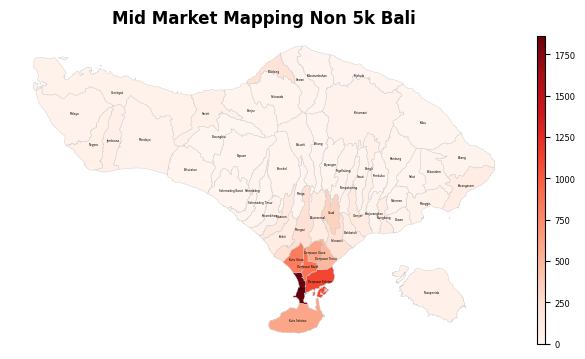

In [ ]:
# Buat figure dan axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor("#ffffff")
ax.axis("off")

# Plot peta
merged_bali.plot(column="Total_Account", cmap="Reds", linewidth=0.3, ax=ax, edgecolor="0.8")

# Buat color map dan normalisasi
cmap = cm.Reds
norm = colors.Normalize(vmin=merged_bali["Total_Account"].min(), vmax=merged_bali["Total_Account"].max())

# Tambahkan colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", aspect=40, shrink=0.5, pad=0.03)
cbar.ax.tick_params(labelsize=6)

# Tambahkan label nama kecamatan
for idx, row in merged_bali.iterrows():
    centroid = row["geometry"].centroid  # Ambil titik tengah polygon
    ax.text(centroid.x, centroid.y, row["ADM3_EN"], fontsize=2, ha="center", va="center", color="black")

# Set judul
ax.set_title("Mid Market Mapping Non 5k Bali", fontdict={"fontsize": 12, "fontweight": "bold"})

# Simpan gambar dengan resolusi tinggi
plt.savefig("/content/drive/My Drive/midmarket_bali.png", dpi=300, bbox_inches="tight")

# Tampilkan plot
plt.show()